In [2]:
# Perceptron

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [6]:
# Generate binary classification data
X, y = make_blobs(n_samples=1000, centers=2, random_state=123)
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# Simple Perceptron class
class Perceptron:
    def train(self, X, y, lr=0.05, n_iters=100):
        self.weights = np.zeros((X.shape[1], 1))
        self.bias = 0
        for _ in range(n_iters):
            a = np.dot(X, self.weights) + self.bias
            y_pred = (a >= 0).astype(int)
            self.weights += lr * np.dot(X.T, (y - y_pred))
            self.bias += lr * np.sum(y - y_pred)

    def predict(self, X):
        return (np.dot(X, self.weights) + self.bias >= 0).astype(int)

In [10]:
# Train and evaluate
model = Perceptron()
model.train(X_train, y_train, n_iters=500)

train_acc = 100 - np.mean(np.abs(model.predict(X_train) - y_train)) * 100
test_acc = 100 - np.mean(np.abs(model.predict(X_test) - y_test)) * 100

print(f"Training Accuracy: {train_acc}%")
print(f"Test Accuracy: {test_acc}%")

Training Accuracy: 100.0%
Test Accuracy: 100.0%


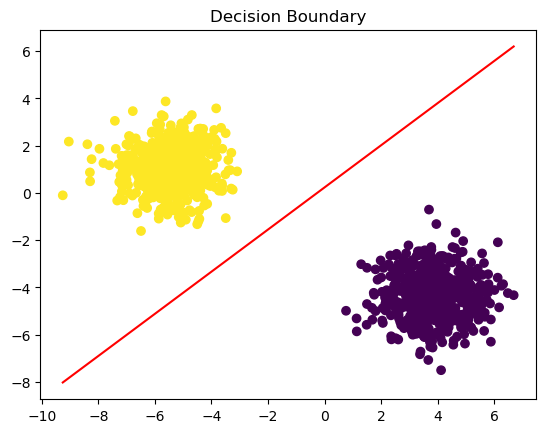

In [12]:
# Plot decision boundary
def plot_boundary(X, y, weights, bias):
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = slope * x_vals + intercept
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel())
    plt.plot(x_vals, y_vals, 'r')
    plt.title("Decision Boundary")
    plt.show()

plot_boundary(X, y, model.weights, model.bias)